# Exercise 6: solution

Discussion and solution for notebook 6.

In [1]:
from IPython.core.display import HTML
css_file = 'nre2_style.css'
HTML(open(css_file, "r").read())

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
%matplotlib inline


1. Write a function that creates a square matrix (N x N) of the form:

$\begin{bmatrix}
-2 & 1 & 0 & 0 & \cdots & 0\\
1 & -2 & 1 &  0 & \cdots & 0\\
0 & 1 & -2 & 1 & \cdots & 0\\
\vdots & & & & & \vdots \\
0 & \cdots & 0 & 1 & -2 & 1 \\
0 & \cdots & 0 & 0 & 1 & -2
\end{bmatrix}$

2. Create an array `b` of length N with b[0] = 10, b[N] = 20, else 0
3. Solve the equation Ax = b with both methods above
4. Time and compare the results

In [4]:
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

a = [1, 1]; b = [2, 2, 2]; c = [3, 3]
A = tridiag(a, b, c)

In [5]:
def tridiag_121(n):
    """Create a tridiagonal matrix of 1 -2 1 form of size n x n"""
    a = np.ones((n-1))
    b = np.ones(n) * (-2)
    return np.diag(a, -1) + np.diag(b) + np.diag(a, 1)

In [6]:
np.diag(np.ones(10),1)

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [7]:
n = 10
A = tridiag_121(n)

In [8]:
b = np.zeros(n)
bc_0 = 10
bc_1 = 20
b[0] = -bc_0
b[-1] =-bc_1

In [9]:
%%timeit
x = np.dot(np.linalg.inv(A), b)

The slowest run took 1906.65 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 21.7 µs per loop


In [10]:
%%timeit
x = np.linalg.solve(A,b)

The slowest run took 142.51 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 18.7 µs per loop


NameError: name 'x' is not defined

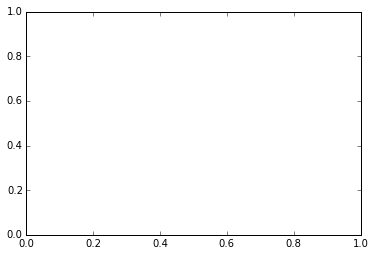

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(n) + 1, x, 'k--')
ax.plot(0, bc_0, 'ro')
ax.plot(n+1, bc_1, 'ro')
ax.set_xlim(-0.15*n, 1.15*n)
ax.set_ylim(bc_0-0.1*bc_1, 1.1*bc_1)

## More efficiency with scipy.sparse

Python has a special implementation for sparse matrices. Check out this page:

http://docs.scipy.org/doc/scipy-0.14.0/reference/sparse.html

And a nice example in this notebook:

http://nbviewer.ipython.org/url/faculty.washington.edu/rjl/notebooks/Tridiagonal.ipynb

Most importantly: the tridiagonal matrix that we created contains many zero elements. These are not stored in memory which leads to a siginficant reduction in memory use.

**Idea**: check ways to test memory? Memory profiling?



Another idea for a tridiagonal matrix solver, written by hand:

https://gist.github.com/ofan666/1875903


In [15]:
from scipy import sparse  # to define sparse matrices

In [16]:
def tridiag_121_sparse(n):
    """Create a sparse 1-2-1 matrix"""

    d_main = np.ones(n) * (-2) # values that will go on main diagonal
    d_sub = np.ones(n)        # values that will go on subdiagonal
    d_super = np.ones(n)      # values that will go on superdiagonal
    data = [d_sub, d_main, d_super]   # list of all the data
    diags = [-1,0,1]                  # which diagonal each vector goes into
    return sparse.spdiags(data,diags,n,n,format='csc')  # create the matrix


In [17]:
A = tridiag_121_sparse(5)

In [18]:
print A

  (0, 0)	-2.0
  (1, 0)	1.0
  (0, 1)	1.0
  (1, 1)	-2.0
  (2, 1)	1.0
  (1, 2)	1.0
  (2, 2)	-2.0
  (3, 2)	1.0
  (2, 3)	1.0
  (3, 3)	-2.0
  (4, 3)	1.0
  (3, 4)	1.0
  (4, 4)	-2.0


In [19]:
A.todense()

matrix([[-2.,  1.,  0.,  0.,  0.],
        [ 1., -2.,  1.,  0.,  0.],
        [ 0.,  1., -2.,  1.,  0.],
        [ 0.,  0.,  1., -2.,  1.],
        [ 0.,  0.,  0.,  1., -2.]])

Thanks to Aaron for this implemmentation:

In [20]:
N=10

A = np.zeros((N,N))

i,j = np.indices((N,N))
A[i==j] = -2.
A[i==j-1] = 1.
A[i==j+1] = 1.

print A

[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.]]


## Sparse matrix example

In [21]:
from scipy.sparse.linalg import spsolve

In [22]:
n = 5
A = tridiag_121_sparse(n)
b = np.zeros(n)
b[0] = -10.
b[-1] = -20.

In [23]:
A.todense()

matrix([[-2.,  1.,  0.,  0.,  0.],
        [ 1., -2.,  1.,  0.,  0.],
        [ 0.,  1., -2.,  1.,  0.],
        [ 0.,  0.,  1., -2.,  1.],
        [ 0.,  0.,  0.,  1., -2.]])

In [24]:
b

array([-10.,   0.,   0.,   0., -20.])

In [25]:
u = spsolve(A, b)

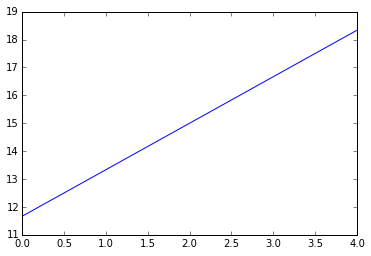

In [26]:
plt.plot(u)

## Test time to solve models

In [27]:
n = 10
A_dense = tridiag_121(n)
b = np.zeros(n)
A_sparse = tridiag_121_sparse(n)
b = np.zeros(n)
b[0] = -10.
b[-1] = -20.

In [28]:
%%timeit
x = np.linalg.solve(A_dense,b)

The slowest run took 5.46 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 18.6 µs per loop


In [29]:
%%timeit
np.dot(np.linalg.inv(A_dense), b)

The slowest run took 5.58 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 22.3 µs per loop


In [30]:
%%timeit
u = spsolve(A_sparse, b)

The slowest run took 4.04 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 37.1 µs per loop
